In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("C:\\Users\\SINDHUJA\\Downloads\\crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:

df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [7]:
df.median()

Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [8]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [9]:
df.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [10]:
df.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [11]:
df.kurt()

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [13]:
df.shape

(50, 5)

In [14]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Normalization of the data


In [17]:
#Normalzation
def norml_data(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [18]:
norm_df=norml_data(df.iloc[:,1:])

In [1]:
norm_df

NameError: name 'norm_df' is not defined

Model creation DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [22]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(norm_df)
distances, indices = neighbors_fit.kneighbors(norm_df)

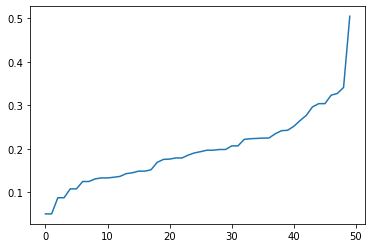

In [23]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [24]:
model=DBSCAN(eps=0.3 ,min_samples= 5,metric='euclidean')
model.fit(norm_df)

DBSCAN(eps=0.3)

In [25]:
model.labels_

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [26]:
df['Clusters'] =model.labels_

In [27]:

norm_df['Clusters'] =model.labels_

In [28]:
norm_df.head(1)

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.65411,0.440678,0.359173,0


In [29]:

norm_df.groupby(norm_df['Clusters']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
-1,0.614028,0.775685,0.667070,0.599114
0,0.838554,0.642466,0.444068,0.424289
1,0.266421,0.240720,0.544013,0.241644
